# Прыжки на батуте: анализ 111

<img src='444.jpg'>

# Описание

Прыжки на батуте - олимпийский вид спорта, суть которого заключается в выполнении акробатических упражнений во время высоких, непрерывных ритмических прыжков на батуте. В профессиональных прыжках на батуте присутствуют 4 дисциплины: индивидуальные прыжки, акробатическая дорожка, синхронные прыжки и двойной минитрамп.

В наборе данных результаты всех соревнований, проводимых Федерацией прыжков на батуте России, которые были взяты с [официального сайта](https://trampoline.ru) в формате .csv за 2021 и 2022 года.

## Оглавление
### 1. Открытие файлов и изучение
### 2. Предобработка данных
        Работа с пропусками
        Создание таблицы
        Унификация данных 
        Замена типов данных
### 3.  Исследовательский анализ данных
        Регионы России
        Девочки/Мальчики
        Лучшие спортсмены
        Особенности
### 4. Общий вывод
    
    

# Открытие файлов и изучение

Импортруем библиотеки, которые будем использовать.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

Так как каждый протокол соревнований это отдельный .csv, но с одинаковой структурой создадим цикл соединяющий все файлы в одну таблицу.

In [2]:
import glob
import os
import codecs

path = r"C:\Users\MAx\Projects-for-ed-main\batut"
files = glob.glob(path + "/*.csv")


li = []

for filename in files:
    data = pd.read_csv(filename, encoding='utf-8', sep = ';', on_bad_lines='skip')
    li.append(data)

df = pd.concat(li, axis=0, ignore_index=True)

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2320635066.py:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, encoding='utf-8', sep = ';', on_bad_lines='skip')


## Изучение

In [3]:
df.head(7)

,#,Event UUID,Title,Subtitle,Discipline,Competition,Stage,Group #,Time,Performance #,...,S4,S5,S6,S7,S8,S9,S10,L,A,∑
0,1,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,2,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",TRA,TEST,Qualification,1,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


Получившаяся таблица объемна и показывает TEST в первых строчках, потому для проверки выводим случайные строки и информацию о ней, чтоб удостоверится, что все в норме.  

In [4]:
df.sample(7)

,#,Event UUID,Title,Subtitle,Discipline,Competition,Stage,Group #,Time,Performance #,...,S4,S5,S6,S7,S8,S9,S10,L,A,∑
148228,13489,8aa9d57a-12cb-465f-6a89-5f4c4cc26b35,Чемпионат и первенство Приволжского федерально...,"г. Тольятти, Самарская область, 26-29 апреля",SYN,синхронные прыжки Юниоры (15-16 лет) МС,Qualification,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
121805,9656,9e998b7b-0096-425b-54f0-b8373b0131a1,Всероссийские соревнования «Памяти ЗТ СССР В.Д...,"г. Москва, 29 ноября - 3 декабря 2021 года",DMT,Девушки (11-12 лет) - программа 1 сп. р.,Qualification,1,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
94343,2094,895fcd72-c6ea-43ae-56c0-db517081125d,"Всероссийские соревнования ""Кубок Сибири"" по п...","г. Новосибирск, 11-15 мая 2021 года",TRA,Юноши (13-14 лет) программа КМС,Qualification,3,"12 мая 2021 года, 12.30 - 13.00",2,...,3.0,3.0,4.0,4.0,4.0,5.0,5.0,2.0,NaN,61.0
138687,3948,8aa9d57a-12cb-465f-6a89-5f4c4cc26b35,Чемпионат и первенство Приволжского федерально...,"г. Тольятти, Самарская область, 26-29 апреля",DMT,двойной минитрамп - Мальчики (9-10 лет)2СП,Qualification,2,27 апреля 13:00-13:35,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7281,7282,ca97c8f2-0887-4412-771f-da8d37b641c6,"Всероссийские соревнования ""Памяти Героя Совет...","г. Краснодар, 19-23 июля 2022 года",DMT,двойной минитрамп - Юноши (13-14 лет),Qualification,1,"20 июля 2022 года, 10:00 - 10:40",7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
88025,28796,03a1efd2-a833-43fd-77bd-4617f32c74f5,Кубок России по прыжкам на батуте 2021 года (№...,"г. Ярославль, 23-27 февраля 2021г",DMT,Рейтинговые соревнования к первенству Европы (...,Qualification,3,"24 февраля, 14.25 - 15.20",5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,92.0
137162,2423,8aa9d57a-12cb-465f-6a89-5f4c4cc26b35,Чемпионат и первенство Приволжского федерально...,"г. Тольятти, Самарская область, 26-29 апреля",TRA,индивидуальные прыжки - Юниоры (15-16 лет)МС,Qualification,1,27 апреля 16:30-17:05,3,...,3.0,4.0,3.0,4.0,4.0,4.0,4.0,1.0,NaN,62.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212846 entries, 0 to 212845
Data columns (total 44 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   #              212846 non-null  int64  
 1   Event UUID     212846 non-null  object 
 2   Title          212846 non-null  object 
 3   Subtitle       212846 non-null  object 
 4   Discipline     212846 non-null  object 
 5   Competition    212846 non-null  object 
 6   Stage          212846 non-null  object 
 7   Group #        212846 non-null  int64  
 8   Time           113227 non-null  object 
 9   Performance #  212846 non-null  int64  
 10  Ranked         212846 non-null  object 
 11  Rank           212846 non-null  int64  
 12  Mark Total     212846 non-null  int64  
 13  Team           212846 non-null  int64  
 14  Team Rank      212846 non-null  int64  
 15  Team Mark      212846 non-null  int64  
 16  Code           0 non-null       float64
 17  Athlete #      212846 non-nul

## Вывод

Таблица содержит 212846 строк и 43 колонки с разными типами данных, а также с пустые колонки. Таблицу следует сильно переработать: изменить структуру, убрать незначимые столбцы, поменять типы данных у столбцов, решить что делать с пропусками в столбцах.

# Предобработка данных

## Работа с пропусками

In [6]:
df.isna().sum()

#                     0
Event UUID            0
Title                 0
Subtitle              0
Discipline            0
Competition           0
Stage                 0
Group #               0
Time              99619
Performance #         0
Ranked                0
Rank                  0
Mark Total            0
Team                  0
Team Rank             0
Team Mark             0
Code             212846
Athlete #             0
External ID           0
Surname              46
Given Name          126
Representing        186
Date of Birth       130
Sex              212846
Routine #             0
Mark                  0
# Elements            0
Bonus                 0
Penalty               0
Judge                 0
?                196266
S1                69714
S2                97042
S3               137558
S4               138930
S5               140097
S6               141029
S7               142189
S8               143910
S9               155474
S10              156753
L               

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# - 0%
Event UUID - 0%
Title - 0%
Subtitle - 0%
Discipline - 0%
Competition - 0%
Stage - 0%
Group # - 0%
Time - 47%
Performance # - 0%
Ranked - 0%
Rank - 0%
Mark Total - 0%
Team - 0%
Team Rank - 0%
Team Mark - 0%
Code - 100%
Athlete # - 0%
External ID - 0%
Surname - 0%
Given Name - 0%
Representing - 0%
Date of Birth - 0%
Sex - 100%
Routine # - 0%
Mark - 0%
# Elements - 0%
Bonus - 0%
Penalty - 0%
Judge - 0%
? - 92%
S1 - 33%
S2 - 46%
S3 - 65%
S4 - 65%
S5 - 66%
S6 - 66%
S7 - 67%
S8 - 68%
S9 - 73%
S10 - 74%
L - 60%
A - 81%
∑ - 8%


В большинстве столбцов все данные присутствуют. Пропуски в столбце `S` связаны со структурой данных, где каждая строка, это сбавки судьи за каждый элемент. Необходимо переработать таблицу, оставив только общую оценку.
Данные в колонке `Sex` полностью отсутствуют. Добавим позже. Столбцы `Time` и `Code` незначимы и от них мы пранируем избавиться.

## Создание таблицы

Уберём полностью пустые строки.

In [8]:
df.dropna(how = 'all', inplace = True)

Так как для нас основная информация это результат каждого спортсмена, то соединим `Surname` и `Given Name` и сделаем `name` индексом базы.

In [9]:
df['name'] = df['Surname'] + " " + df['Given Name']
df['name'] = df['name'].str.title()
df.set_index('name',  inplace = True)

Теперь пробуем с помощью сводной таблицы "перевернуть" изначальную и добыть необходимые данные. Оптимизируем вычислительные ресурсы компьютера на создание pivot_table и выберем столбцы, которые меняются со временем. Остальные добавим позже слиянием.

In [10]:
df1 = df.pivot_table('∑', ['name', 'Subtitle', 'Discipline', 'Stage', 'Routine #'], 'Judge')
df1.reset_index(drop=False, inplace=True)
df1.set_index('name',  inplace = True)
df1 = df1[['Subtitle', 'Discipline', 'Stage', 'Routine #', 'D', 'E∑', 'H', 'T']]
df1.drop_duplicates(inplace = True)
df1

Judge,Subtitle,Discipline,Stage,Routine #,D,E∑,H,T
name,,,,,,,,
Test 2 Test 2,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Qualification,1,0.0,200.0,0.0,0.0
Test 2 Test 2,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Qualification,2,0.0,0.0,0.0,0.0
Test Test,"г. Москва, 29 ноября - 3 декабря 2021 года",DMT,Qualification,1,0.0,295.0,0.0,0.0
Test Test,"г. Москва, 29 ноября - 3 декабря 2021 года",DMT,Qualification,2,0.0,0.0,0.0,0.0
Test Test,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Qualification,2,0.0,200.0,0.0,0.0
...,...,...,...,...,...,...,...,...
Яровой Владислав,"г. Новосибирск, 11-15 мая 2021 года",TUM,Qualification,2,22.0,259.0,0.0,0.0
Яровой Владислав,"г. Новосибирск, 11-15 мая 2021 года",TUM,Team Final,1,33.0,251.0,0.0,0.0
Яценко Виктория,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Final,1,58.0,157.0,950.0,12265.0


В этой таблице оставим строки из исходной таблицы, которые пригодятся далее.

In [11]:
df2 = df[['Subtitle', 'Competition',
    'Discipline', 
         'Stage', 'Sex', 
        'Representing',
   'Routine #',
    '# Elements', 'Rank']]
df2

,Subtitle,Competition,Discipline,Stage,Sex,Representing,Routine #,# Elements,Rank
name,,,,,,,,,
Test Testov,"г. Краснодар, 19-23 июля 2022 года",TEST,TRA,Qualification,NaN,Test city,1,10,1
Test Testov,"г. Краснодар, 19-23 июля 2022 года",TEST,TRA,Qualification,NaN,Test city,1,10,1
Test Testov,"г. Краснодар, 19-23 июля 2022 года",TEST,TRA,Qualification,NaN,Test city,1,10,1
Test Testov,"г. Краснодар, 19-23 июля 2022 года",TEST,TRA,Qualification,NaN,Test city,1,10,1
Test Testov,"г. Краснодар, 19-23 июля 2022 года",TEST,TRA,Qualification,NaN,Test city,1,10,1
...,...,...,...,...,...,...,...,...,...
Погромская Татьяна,"г. Санкт-Петербург, 22-26 сентября 2021 года",Женщины,SYN,Final,NaN,Ростовская область,1,10,4
Погромская Татьяна,"г. Санкт-Петербург, 22-26 сентября 2021 года",Женщины,SYN,Final,NaN,Ростовская область,1,10,4
Погромская Татьяна,"г. Санкт-Петербург, 22-26 сентября 2021 года",Женщины,SYN,Final,NaN,Ростовская область,1,10,4


Обьединяем сводную таблицу с подготовленной.

In [12]:
df = pd.merge(df1, df2, on = ['name', 'Subtitle', 'Discipline', 'Stage', 'Routine #'])
df.drop_duplicates(inplace = True)
df

,Subtitle,Discipline,Stage,Routine #,D,E∑,H,T,Competition,Sex,Representing,# Elements,Rank
name,,,,,,,,,,,,,
Test 2 Test 2,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Qualification,1,0.0,200.0,0.0,0.0,TEST,NaN,NaN,10,2
Test 2 Test 2,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Qualification,2,0.0,0.0,0.0,0.0,TEST,NaN,NaN,0,2
Test Test,"г. Москва, 29 ноября - 3 декабря 2021 года",DMT,Qualification,1,0.0,295.0,0.0,0.0,test,NaN,NaN,2,1
Test Test,"г. Москва, 29 ноября - 3 декабря 2021 года",DMT,Qualification,2,0.0,0.0,0.0,0.0,test,NaN,NaN,0,1
Test Test,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Qualification,2,0.0,200.0,0.0,0.0,TEST,NaN,NaN,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Яровой Владислав,"г. Новосибирск, 11-15 мая 2021 года",TUM,Qualification,2,22.0,259.0,0.0,0.0,"командные соревнования, Юниоры (13-16 лет)",NaN,Омская область,8,8
Яровой Владислав,"г. Новосибирск, 11-15 мая 2021 года",TUM,Team Final,1,33.0,251.0,0.0,0.0,"командные соревнования, Юниоры (13-16 лет)",NaN,Омская область,8,7
Яценко Виктория,"г. Москва, 29 ноября - 3 декабря 2021 года",TRA,Final,1,58.0,157.0,950.0,12265.0,Девочки (9-10 лет) - программа 2 сп. р.,NaN,Краснодарский край,10,6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15179 entries, Test 2 Test 2 to Яценко Виктория
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Subtitle      15179 non-null  object 
 1   Discipline    15179 non-null  object 
 2   Stage         15179 non-null  object 
 3   Routine #     15179 non-null  int64  
 4   D             15179 non-null  float64
 5   E∑            15179 non-null  float64
 6   H             15179 non-null  float64
 7   T             15179 non-null  float64
 8   Competition   15179 non-null  object 
 9   Sex           0 non-null      float64
 10  Representing  15174 non-null  object 
 11  # Elements    15179 non-null  int64  
 12  Rank          15179 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 1.6+ MB


В результате получили таблицу с которой можно работать, где
* `index` - имя участника
* `Subtitle` - подназвание соревнований
* `Discipline` - снаряд на котором выступает участник
* `Stage` - стадия соревнований
* `Routine #` - номер комбинации
* `D` - сложность комбинации
* `E∑` - общая оценка комбинации
* `H` - перемещение по сетке
* `T` - время комбинации
* `Competition` - название соревнования
* `Sex` - пол участника
* `Representing` - регион участника
* `# Elements` - количество элементов
* `Rank` - место участника

## Унификация и замена типов данных

Теперь давайте узнаем сколько уникальных данных в каждом столбце. Это нам поможет найти возможные ошибки, а также подскажет, где подходит тип данных каталог.

In [24]:
df.nunique()

Subtitle          13
Discipline         4
Stage              7
Routine #          2
D                205
E∑               627
H                204
T               2840
Competition      150
Sex                2
Representing      40
# Elements        12
Rank              72
Razr               3
dtype: int64

Теперь давайте пройдемся по всем немногочисленным столбцам и узнаем что находятся в базе.

In [14]:
df['Subtitle'].unique()

array(['г. Москва, 29 ноября - 3 декабря 2021 года',
       'г. Санкт-Петербург, 22-26 сентября 2021 года',
       'г. Новосибирск, 11-15 мая 2021 года',
       'Новый Уренгой, Ямало-Ненецкий автономный округ, 26-30 апреля',
       'г.   Иваново, 3-7 декабря 2021 года',
       'г. Тольятти, Самарская область, 26-29 апреля',
       '27 апреля - 01 мая, Комсомольск-на-Амуре',
       'г. Таганрог, Ростовская область, 28 июня - 02 июля 2021 года',
       'г. Санкт-Петербург, 25-29 августа 2021 года',
       'г. Ярославль, 23-27 февраля 2021г',
       'г. Оренбург, 06-09 июля 2021 года',
       'г. Москва, 02-05 февраля 2021 года',
       'г.Ярославль, Ярославская область, 5-8 июля 2022'], dtype=object)

In [15]:
df['Competition'].unique()

array(['TEST', 'test', 'Юноши (11-12 лет) - программа 1 сп. р.',
       'Юноши (11-12 лет) программа 1 сп.р.',
       'Девушки (11-12 лет) - программа 1 сп. р.',
       'Девушки (11-12 лет) программа 1 сп.р.',
       'двойной минитрамп - Девушки (11-12 лет)1СП',
       'акробатическая дорожка - Девушки (11-12 лет)1СП',
       'Мальчики (9-10 лет) - программа 2 сп.р.',
       'Мальчики (9-10 лет) программа 1 сп.р.',
       'двойной минитрамп - Мальчики (9-10 лет)2СП',
       'акробатическая дорожка - Мальчики (9-10 лет) 2СП',
       'Юноши (13-14 лет)', 'синхронные прыжки - Девочки (9-10 лет)2СП',
       'индивидуальные прыжки - Девочки (9-10 лет)2СП',
       'синхронные прыжки - Мальчики (9-10 лет)2СП',
       'индивидуальные прыжки - Мальчики (9-10 лет)2СП',
       'двойной минитрамп - Юноши (11-12 лет)1СП',
       'синхронные прыжки - Юноши (11-12 лет)1СП',
       'индивидуальные прыжки - Юноши (11-12 лет)1СП',
       'двойной минитрамп - Девочки (9-10 лет)',
       'индивидуальные п

В этом столбце содержится информация о важных деталях для анализа: гендере и разряде спортсмена, но она не структурирована. Также присутствуют тестовые результаты, которые следует убрать.

In [ ]:
df = df[~df['Competition'].isin(['test', 'TEST'])]

Сделаем столбец `Razr` и добавим информацию в столбец `Sex`, из данных о соревновании `Competition`.

In [17]:
mask = df['Competition'].str.contains('11')
df.loc[mask, 'Razr'] = '1rz'
mask = df['Competition'].str.contains('9')
df.loc[mask, 'Razr'] = '1rz'
mask = df['Competition'].str.contains('КМС')
df.loc[mask, 'Razr'] = 'KMC'
mask = df['Competition'].str.contains('13')
df.loc[mask, 'Razr'] = 'KMC'
mask = df['Competition'].str.contains('15')
df.loc[mask, 'Razr'] = 'MC'
mask = df['Competition'].str.contains('Мужчины')
df.loc[mask, 'Razr'] = 'MC'
mask = df['Competition'].str.contains('Женщины')
df.loc[mask, 'Razr'] = 'MC'
mask = df['Competition'].str.contains('МС')
df.loc[mask, 'Razr'] = 'MC'
mask = df['Competition'].str.contains('17')
df.loc[mask, 'Razr'] = 'MC'

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\4192749175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[mask, 'Razr'] = '1rz'


In [19]:
df['Competition'] = df['Competition'].str.title()
mask = df['Competition'].str.contains('Юниоры')
df.loc[mask, 'Sex'] = 'M'
mask = df['Competition'].str.contains('Юноши')
df.loc[mask, 'Sex'] = 'M'
mask = df['Competition'].str.contains('Мальчики')
df.loc[mask, 'Sex'] = 'M'
mask = df['Competition'].str.contains('Мужчины')
df.loc[mask, 'Sex'] = 'M'
mask = df['Competition'].str.contains('Юниорки')
df.loc[mask, 'Sex'] = 'F'
mask = df['Competition'].str.contains('Девочки')
df.loc[mask, 'Sex'] = 'F'
mask = df['Competition'].str.contains('Девушки')
df.loc[mask, 'Sex'] = 'F'
mask = df['Competition'].str.contains('Женщины')
df.loc[mask, 'Sex'] = 'F'

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2013799229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Competition'] = df['Competition'].str.title()
C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2013799229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[mask, 'Sex'] = 'M'


In [18]:
df['Razr'].isna().sum()

0

In [20]:
df[df['Razr'].isna() == True]

,Subtitle,Discipline,Stage,Routine #,D,E∑,H,T,Competition,Sex,Representing,# Elements,Rank,Razr
name,,,,,,,,,,,,,,


Получилось: столбцы с рязрядом и полом участника теперь полностью заполнены и присутствуют в таблице.

In [21]:
df['Representing'].unique()

array(['Ямало-Ненецкий автономный округ', 'ЯНАО', 'Белгородская область',
       'Самарская область', 'Свердловская область', 'Хабаровский край',
       'Краснодарский край', 'Иркутская область', 'Москва',
       'Ивановская область', 'Воронежская область',
       'Республика Башкортостан', 'ХМАО-Югра',
       'Ханты-Мансийский автономный округ', 'Ростовская область',
       'Новосибирская область', 'Тверская область',
       'ГБУ "СШОР №41 "Москоречье', 'Омская область', 'ГБПОУ "МССУОР" №1',
       'Санкт-Петербург', 'Республика Татарстан', 'Магаданская область',
       'Тюменская область', 'Сахалинская область',
       'ГБУ "СШОР №41 "Москоречье"', 'Красноярский край',
       'Ставропольский край', 'Приморский край', 'Клуб "АС"',
       'Кировская область', 'ГБУ "СШОР №29 "Хамовники"',
       'Оренбургская область', 'Ярославская область',
       'Московская область', 'Курганская область', 'Челябинская область',
       'СК "ОГО"', 'Брянская область', 'Клуб "Yourways"', 'БАЦ "Сальто"',

Стандартизируем столбец, убрав аббревиатуры, разный регистр и объединим организации Москвы.

In [22]:
mask = df['Representing'].str.contains(',')
df.loc[mask, 'Representing'] = '2 области'
mask = df['Representing'].str.contains('ЯНАО')
df.loc[mask, 'Representing'] = 'Ямало-Ненецкий автономный округ'
mask = df['Representing'].str.contains('ХМАО-Югра')
df.loc[mask, 'Representing'] = 'Ханты-Мансийский автономный округ'
mask = df['Representing'].str.contains('оренбургская область')
df.loc[mask, 'Representing'] = 'Оренбургская область'
mask = df['Representing'].str.contains('БАЦ')
df.loc[mask, 'Representing'] = 'Москва'
mask = df['Representing'].str.contains('ГБУ')
df.loc[mask, 'Representing'] = 'Москва'
mask = df['Representing'].str.contains('ГБПОУ "МССУОР" №1')
df.loc[mask, 'Representing'] = 'Москва'
mask = df['Representing'].str.contains('Клуб')
df.loc[mask, 'Representing'] = 'Москва'
mask = df['Representing'].str.contains('БП "Небо"')
df.loc[mask, 'Representing'] = 'Москва'
mask = df['Representing'].str.contains('СК "ОГО"')
df.loc[mask, 'Representing'] = 'Москва'

In [23]:
df['Stage'].unique()

array(['Qualification', 'Final', 'Quarterfinal', 'Semifinal',
       'Qualification2', 'Team Final', 'Final2'], dtype=object)

В некоторых столбцах мало уникальных значений и изменим им тип данных на категорию. Смущает, что в столбце `# Elements` уникальных данных 12 ведь элементов всего 10.

In [25]:
df['# Elements'].unique()

array([ 1,  2,  8,  0, 10,  6,  3,  9,  4,  5,  7, -1], dtype=int64)

Узнаем какие строки имеют отрицательное количество элементов.

In [26]:
df.loc[df['# Elements'] == -1]

,Subtitle,Discipline,Stage,Routine #,D,E∑,H,T,Competition,Sex,Representing,# Elements,Rank,Razr
name,,,,,,,,,,,,,,
Зотова Виталина,"г. Тольятти, Самарская область, 26-29 апреля",TUM,Qualification,1,-1.0,20.0,0.0,0.0,Акробатическая Дорожка - Девочки (9-10 Лет)2Сп,F,Самарская область,-1,6,1rz
Ключников Роман,"г. Тольятти, Самарская область, 26-29 апреля",TRA,Final,1,0.0,0.0,0.0,0.0,Индивидуальные Прыжки - Юноши (11-12 Лет)1Сп,M,Республика Башкортостан,-1,8,1rz
Моисеев Леонид,"Новый Уренгой, Ямало-Ненецкий автономный округ...",TUM,Team Final,1,0.0,20.0,0.0,0.0,Акробатическая Дорожка - Юниоры (13-16 Лет),M,Ямало-Ненецкий автономный округ,-1,13,KMC
Мурскова Варвара,"г. Таганрог, Ростовская область, 28 июня - 02 ...",TRA,Qualification,1,0.0,0.0,915.0,0.0,Юниорки (15-16 Лет),F,Самарская область,-1,30,MC
Мурскова Варвара,"г. Таганрог, Ростовская область, 28 июня - 02 ...",TRA,Team Final,1,0.0,0.0,915.0,0.0,Юниорки (15-16 Лет),F,Самарская область,-1,30,MC
Орлова Юлиана,"г. Тольятти, Самарская область, 26-29 апреля",TUM,Qualification,2,0.0,20.0,0.0,0.0,Акробатическая Дорожка - Женщины,F,Республика Татарстан,-1,13,MC


Закономерности никакой нет, поэтому удалим эти строки.

In [27]:
df.drop(df.loc[df['# Elements'] == -1].index, inplace=True)

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\3603242229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.loc[df['# Elements'] == -1].index, inplace=True)


Оценки находятся в разном формате и необходимо привести к одному 

In [28]:
df['E∑'] = df['E∑']/10
df['H'] = df['H']/100
df['T'] = df['T']/1000

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\1044991377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['E∑'] = df['E∑']/10
C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\1044991377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['H'] = df['H']/100
C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\1044991377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

## Замена типов данных

Из-за того, что некоторые соревнования проводятся по кубковой системе возникают разные стадии. Оставим только основные стадии и присвоим тип каталога. Также столбцы `Subtitle`, `Routine #`, `Sex`, `Razr`  и `Discipline` имеют мало уникальных значений и также подходят для каталога.

In [29]:
mask = df['Stage'].str.contains('Final2')
df.loc[mask, 'Stage'] = 'Final'
mask = df['Stage'].str.contains('Quarterfinal')
df.loc[mask, 'Stage'] = 'Semifinal'
mask = df['Stage'].str.contains('Qualification2')
df.loc[mask, 'Stage'] = 'Qualification'

In [30]:
df['Subtitle']= df['Subtitle'].astype('category')
df['Discipline']= df['Discipline'].astype('category')
df['Stage']= df['Stage'].astype('category')
df['Routine #']= df['Routine #'].astype('category')
df['Sex']= df['Sex'].astype('category')
df['Razr']= df['Razr'].astype('category')

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2379133896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subtitle']= df['Subtitle'].astype('category')
C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2379133896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discipline']= df['Discipline'].astype('category')
C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2379133896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## Вывод

За этот шаг мы унифицировали данные, заменили типы данных, выделили дополнительные колонки для анализа, обосновали нахождение пропусков. Можно приступать к анализу.

# Исследовательский анализ данных

Нам предстоит рассмотреть какие регионы РФ доминируют в соревнованиях, какие есть отличия между мальчиками и девочками, какие спортсмены выигрывают, выяснить засчет каких компонентов и найти инсайты.

## Регионы России

<AxesSubplot:>

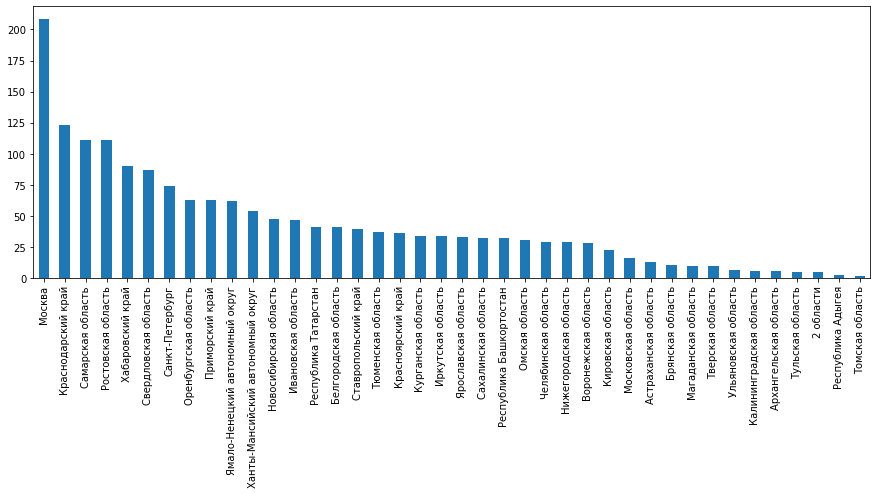

In [31]:
start = pd.Series(df[~df.index.duplicated(keep='first')]['Representing'].value_counts(),
                  name="Спортсмены")
start.plot(kind = 'bar')

Судя по графику наибольшее количество спортсменов и со значительным отрывом из Москвы. Также обращаем внимание, что не все области России принимают участия в соревнованиях.

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\305495946.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  mm[{1,2,3}].plot(kind = 'bar')


<AxesSubplot:xlabel='Representing'>

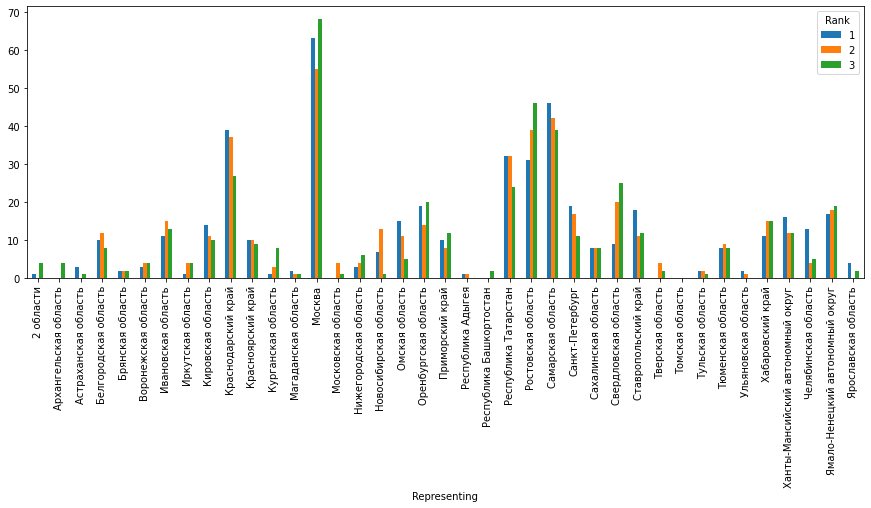

In [32]:
mm = pd.pivot_table(data = df[(df['Stage'] == 'Final')], 
               index = 'Representing', 
               columns = 'Rank',
               values = 'Stage',
               aggfunc = 'count')
mm[{1,2,3}].plot(kind = 'bar')

По местам и их количеству ситуация похожая, наибольшее количество медалей забирает Москва, Ростовская и Самарская область, которые и были лидерами по объему участников. Но также видим, что Краснодарский край, второй по количеству показывает худшие результаты, а Татарстан, наоборот, показывает выдающуюся результативность.

<AxesSubplot:>

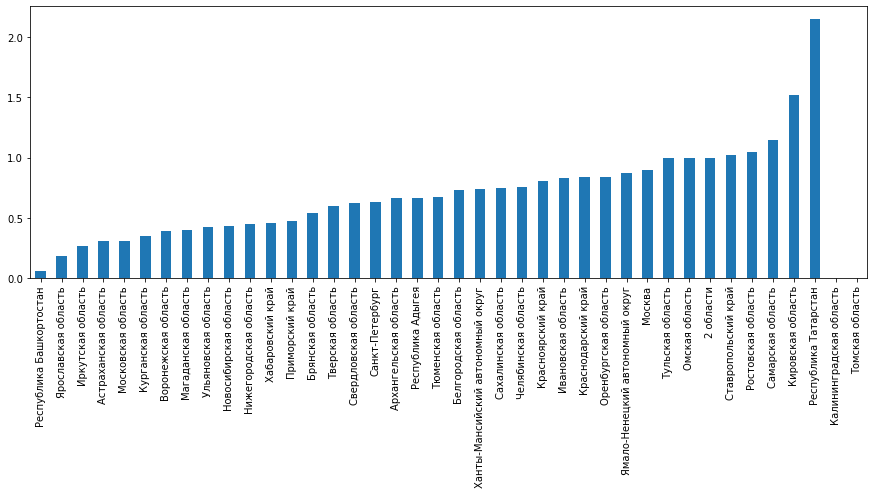

In [33]:
bbb = df[(df['Rank'] < 4) & (df['Stage'] == 'Final')].groupby(['Representing']).size()
rrtt = bbb/start
rrtt.sort_values().plot(kind = 'bar')

Посчитаем эффективность и видим, что Татарстан наиболее результативен в получении медалей на соревнованиях, а значение около 2 означает, что каждый спортсмен получает примерно 2 медали. Это возможно ведь видов спорта четыре и потенциально можно участвовать во всех. Заметим, что Томская и Калининградская область не были призерами не разу.

In [34]:
kolvo = pd.Series(df['Representing'].value_counts(), name="Старты")
er = pd.concat([kolvo,start], axis=1)
er['Итог'] = er['Старты'] / er['Спортсмены']
er.sort_values('Итог', inplace = True)
er

,Старты,Спортсмены,Итог
Калининградская область,13,6,2.166667
Томская область,7,2,3.500000
Брянская область,43,11,3.909091
Хабаровский край,433,90,4.811111
Магаданская область,50,10,5.000000
Курганская область,180,34,5.294118
Сахалинская область,174,32,5.437500
Иркутская область,186,34,5.470588
Ульяновская область,39,7,5.571429
Приморский край,364,63,5.777778


Оценим работоспособность каждой области, т.е. подсчитаем среднее количество выступлений каждого спортсмена. Видеть Татарстан логично, ведь при попадании в финал, надо пройти через полуфинал и количество выступлений растет. Но в лидерах неожиданно Тюменская область. Это означает или их спортсмены 'многостаночники' и прыгают на нескольких снарядах сразу, или не могут зацепиться за призы.

<AxesSubplot:xlabel='Representing'>

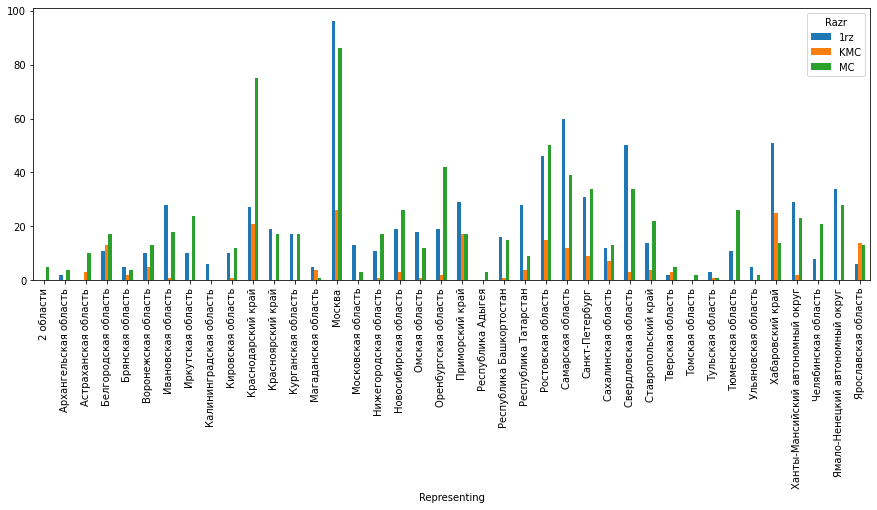

In [35]:
pd.pivot_table(df[~df.index.duplicated(keep='first')], 
               values = 'D', 
               index = ['Representing'], 
               columns = 'Razr', 
               aggfunc=len).plot(kind = 'bar')


На графике, разделенном по разрядам видим отличия. Выделяется ревосходство Москвы во всех группах, но процент молодых спортсменов Краснодарского края существенно меньше, в Хабаровском крае много КМС, и вообще, в группе КМС меньше представителей областей. Возможно, это связано с тем что КМС ограничивается 2 годами спортсмена. 

<AxesSubplot:xlabel='Representing'>

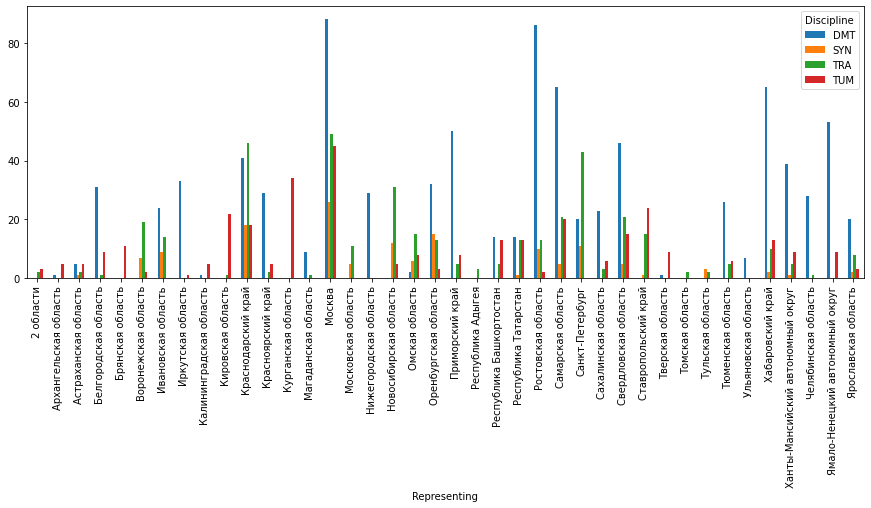

In [36]:
pd.pivot_table(df[~df.index.duplicated(keep='first')], 
               values = 'D', 
               index = ['Representing'], 
               columns = 'Discipline', 
               aggfunc=len).plot(kind = 'bar')

На этом графике видим распределение разрядов. 
* Минитрамп(DMT) популярный, вероятно потому что надо делать 2 элемента, а не 8 как дорожке(TUM) или на батуте(TRA, SYN). Синхрон самый непопулярный
* Областей, где представлены все разряды немного.
* Количество спортсменов на батуте Самарская и Ростовская область низко. В отличие, от Санкт-Петербурга, где их много, а дорожки нет совсем.


Далее давайте рассматривать только один вид спорта основной батут.

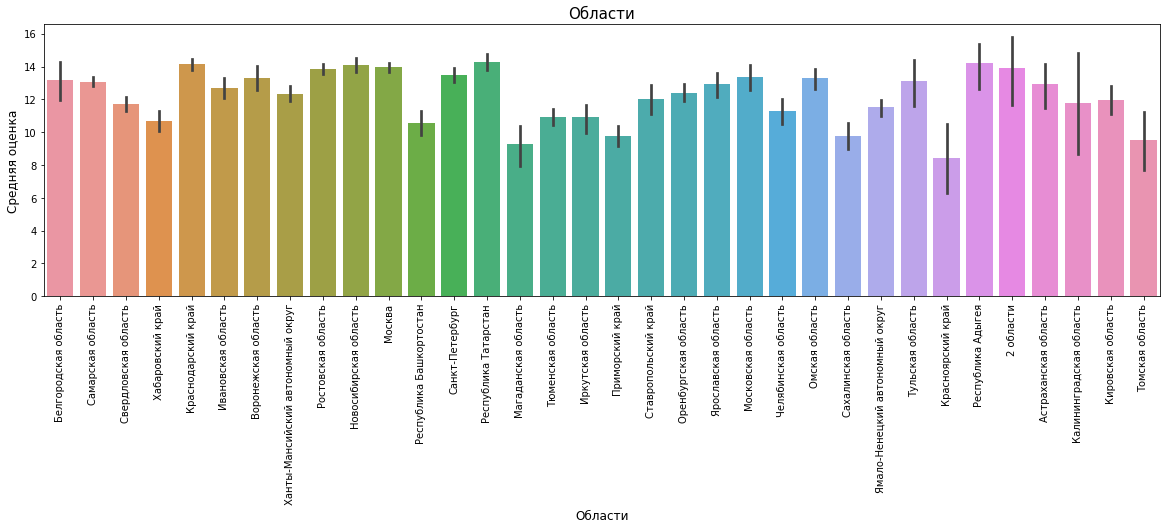

In [37]:
plt.figure(figsize = (20,5))

g = sns.barplot(data=df[df['Discipline'] == 'TRA'],  x = 'Representing', y = 'E∑')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Области", fontsize=15)
g.set_xlabel("Области", fontsize=12)
g.set_ylabel("Средняя оценка", fontsize=12)

plt.show()

Рассмотрим по очереди компонты из которых складывается оценка. Заметен большой разброс в средней оценке, которая максимум 20. У областей от которых наиболее количество участников очень высокий средний балл и минимальный разброс, что говорит о хорошей подготовке и хорошем отборе представителей. 

<AxesSubplot:xlabel='Representing'>

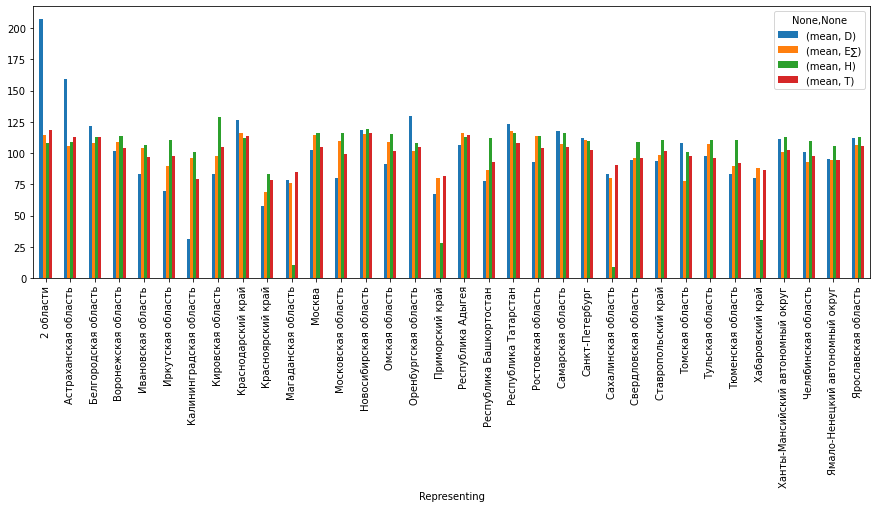

In [38]:
plt.rcParams["figure.figsize"] = (15,5)

ui = pd.pivot_table(df[(df['Discipline'] == 'TRA')], values = ['E∑', 'D', 'T', 'H'], index=['Representing'], aggfunc=[np.mean], fill_value=0).apply(lambda x:100 * x / float(x.mean())).round(2)
ui.plot(kind = 'bar')


На компоненты оценки, сложности, времени полета и перемещения по сетке посмотрим со стороны насколько они отличаются от среднего 100% в большую или меньшую сторону. 
* Компоненты оценки идут вместе, если ты прыгаешь сложно, ты прыгаешь чисто и высоко.
* Видим что Санкт-Петербург, Краснодарский край, Татарстан выделяются, причем  гармонично по всем показателям.
* Также положительно выделяется Новосибирская область, которую мы не выделяли ранее. 
* Отмечаем также спортсменов у кого указано 2 области в протоколе и их отличные результаты. Вероятно, эти участники взрослые и прыгают хорошо и достигают рерультатов ставят 2 области специально, переехали, но не зыбывают и показывают кто их воспитал. 

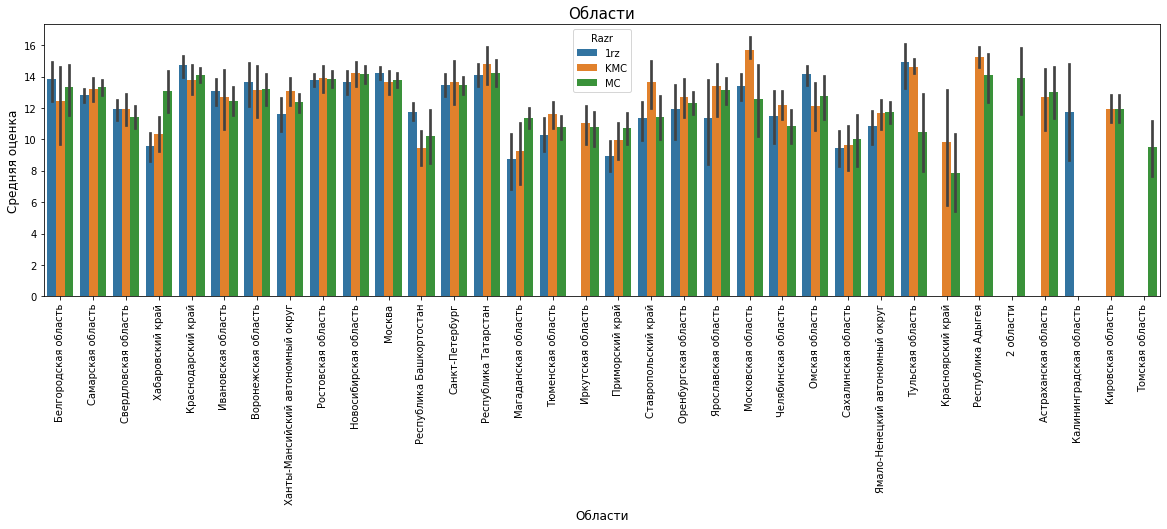

In [39]:
plt.figure(figsize = (20,5))

g = sns.barplot(data=df[df['Discipline'] == 'TRA'],  x = 'Representing', y = 'E∑', hue = 'Razr')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Области", fontsize=15)
g.set_xlabel("Области", fontsize=12)
g.set_ylabel("Средняя оценка", fontsize=12)

plt.show()

По этому графику можно оценить где хорошая начальная подготовка и возможно будующий потенциал. Ведь обычно хорошие спортсмены, не возникают вдруг. Так Московская область показывает качественный результат при большом количестве участников с минимальным разбросом оценок.

Теперь предлагаю рассмотреть немаловажный фактор как падения, те невыполнение элемента до конца

In [40]:
oij = df[df['Discipline'] == 'TRA'].groupby(['Representing']).size().sum()
zaa = df[(df['Discipline'] == 'TRA') & (df['# Elements'] == 10)].groupby(['Representing']).size().sum()
zaa/oij

0.7892294946147473

79% комбинаций выполняются до конца.

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\2058086503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rt'] = np.where(df['# Elements']==10,'не упал','упал')


<AxesSubplot:xlabel='Representing'>

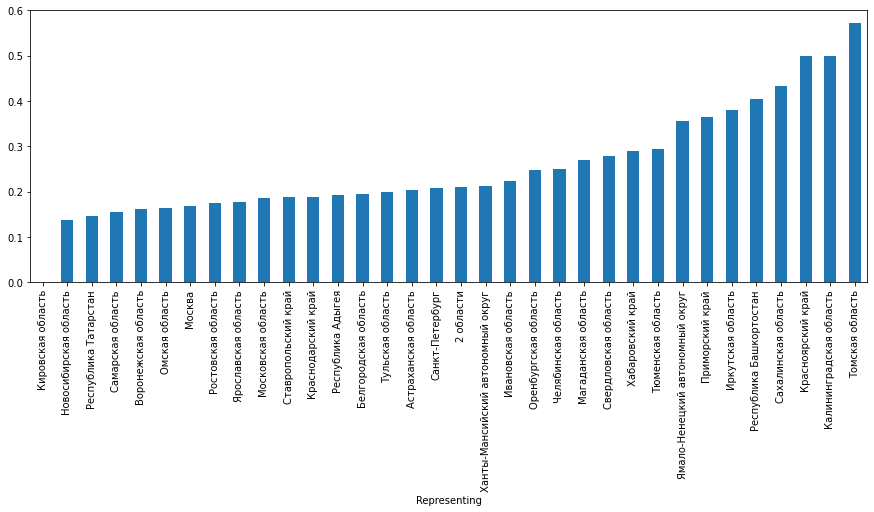

In [41]:
df['rt'] = np.where(df['# Elements']==10,'не упал','упал')
rrr = pd.pivot_table(df[(df['Discipline'] == 'TRA')], index=['Representing'], values = '# Elements', columns = 'rt', aggfunc=['count'], fill_value=0)

nnn = rrr[('count', 'упал')]/(rrr[('count', 'упал')] + rrr[('count', 'не упал')])
nnn.sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Representing'>

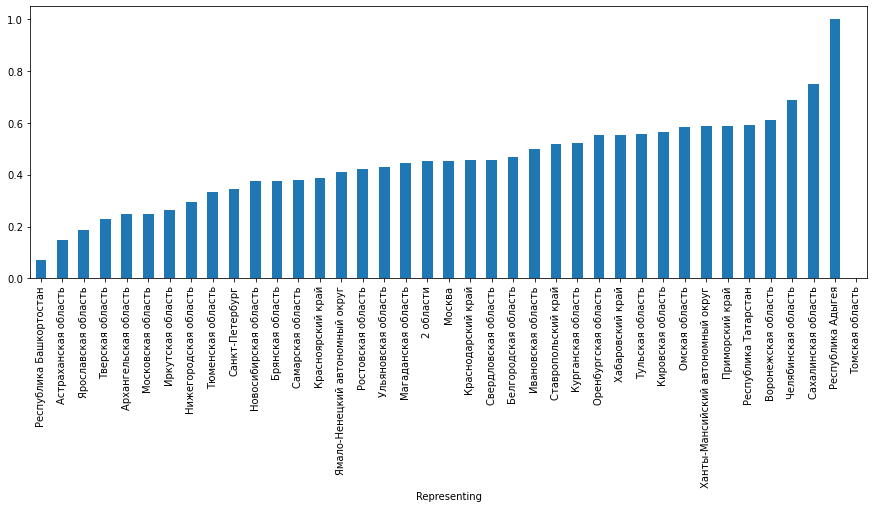

In [42]:
nnn = df[df['Stage'] == 'Final'].groupby(['Representing']).size()
bbb = df[(df['Rank'] < 4) & (df['Stage'] == 'Final')].groupby(['Representing']).size()
rrtt = bbb/nnn
rrtt.sort_values().plot(kind = 'bar')

Данные графики показывают, что 
* Вот ответ почему Новосибирская область и Татарстан показывает результаты выше среднего: они существенно реже падают.
* В лидерах падения области от куда мало спортсменов. 
* Психология в финале важна и помогает  получать медали. Ближе к концу виден Санкт-Петербург, у них много спортсменов и мало медалей и вот почему. Они не могут собраться в финале.

## Вывод

1. Самые большие представительства забирарают большее количество медалей
2. Если области, которые специализируются на одном конкретном виде спорта
3. Легкие снаряды привлекают участников.
4. Бесспорно лучшая сборная по реализации это Татарстан.
5. Компоненты оценки идут вместе, если ты прыгаешь сложно, ты прыгаешь чисто и высоко.

## Девочки/Мальчики

Изучим, как разделяются по полам. И для начала узнаем соотношение полов. 

<AxesSubplot:ylabel='Sex'>

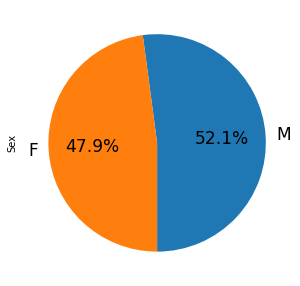

In [43]:
df[~df.index.duplicated(keep='first')]['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=270, fontsize=17)

Количество примерно равно, а что насчет результатов

In [44]:
pd.pivot_table(data=df[df['Discipline'] != 'SYN'], 
                   values = ['E∑', 'T', 'H', 'D'], 
                   index=[ 'Discipline','Sex',], 
                   aggfunc=[np.mean], 
                   fill_value=0, ).round(2)

mean                    
                    D     E∑     H      T
Discipline Sex                           
DMT        F    28.88  24.39  0.00   0.00
           M    41.20  23.94  0.00   0.00
TRA        F    46.91  12.98  7.81  12.10
           M    55.73  12.93  7.78  12.68
TUM        F    29.47  21.59  0.00   0.00
           M    39.40  22.09  0.00   0.00

<AxesSubplot:xlabel='Discipline', ylabel='D'>

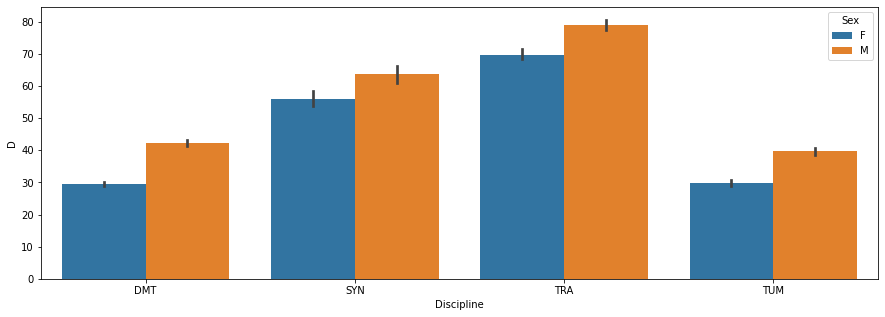

In [45]:
sns.barplot(x='Discipline', y='D', hue='Sex', data=df[(df['D'] != 0)])

Эта таблица и график наглядно говорят о том, что девочки прыгают аккуратнее (средняя оценка судей и перемещения выше), но ниже и легче. Кроме выступлений на акрабатической дорожке.

In [46]:
pol_m = df[(df['Sex'] == 'M')]
pol_f = df[(df['Sex'] == 'F')]

pol_m.index & pol_f.index

C:\Users\MAx\AppData\Local\Temp\ipykernel_12796\4069535062.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  pol_m.index & pol_f.index


Index([], dtype='object', name='name')

0 челевок сменили пол

## Лучшие спортсмены

In [47]:
df[~df.index.duplicated(keep='first')]['Representing']

name
Абдуллаев Мирали       Ямало-Ненецкий автономный округ
Абдуллина Елизавета    Ямало-Ненецкий автономный округ
Абжалимов Мартин       Ямало-Ненецкий автономный округ
Абрамов Дмитрий                   Белгородская область
Абрамова Виктория                    Самарская область
                                    ...               
Яманов Кирилл                     Белгородская область
Ямщикова Мария                       Тюменская область
Янбаев Дамиль                      Челябинская область
Яровой Владислав                        Омская область
Яценко Виктория                     Краснодарский край
Name: Representing, Length: 1735, dtype: object

Список всех спортсменов, принимавших участие в соревнованиях.

In [48]:
trr = (df['Stage'] == 'Final') & (df['Rank'] == 1)
df.loc[trr]

,Subtitle,Discipline,Stage,Routine #,D,E∑,H,T,Competition,Sex,Representing,# Elements,Rank,Razr,rt
name,,,,,,,,,,,,,,,
Абжалимов Мартин,"Новый Уренгой, Ямало-Ненецкий автономный округ...",TUM,Final,1,13.0,17.5,0.0,0.000,Акробатическая Дорожка - Мальчики (9-10 Лет) 2Сп,M,Ямало-Ненецкий автономный округ,8,1,1rz,упал
Азарян Сергей,"г. Ярославль, 23-27 февраля 2021г",SYN,Final,1,160.0,795.0,9.0,0.855,Мужчины,M,Воронежская область,10,1,MC,не упал
Акименко Кира,"Новый Уренгой, Ямало-Ненецкий автономный округ...",DMT,Final,1,34.0,18.8,0.0,0.000,Двойной Минитрамп - Девушки (11-12 Лет)1Сп,F,Ханты-Мансийский автономный округ,2,1,1rz,упал
Акименко Кира,"Новый Уренгой, Ямало-Ненецкий автономный округ...",TRA,Final,1,88.0,13.7,9.3,12.910,Индивидуальные Прыжки - Девушки (11-12 Лет)1Сп,F,Ханты-Мансийский автономный округ,10,1,1rz,не упал
Акимцев Иван,"г. Таганрог, Ростовская область, 28 июня - 02 ...",DMT,Final,1,84.0,28.4,0.0,0.000,Мужчины,M,Ростовская область,2,1,MC,упал
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Щербакова Сюзанна,"27 апреля - 01 мая, Комсомольск-на-Амуре",TUM,Final,1,22.0,17.1,0.0,0.000,Акробатическая Дорожка - Женщины,F,Сахалинская область,8,1,MC,упал
Юдин Леонид,"г. Таганрог, Ростовская область, 28 июня - 02 ...",TRA,Final,1,114.0,17.1,9.2,15.940,Мужчины,M,Ростовская область,10,1,MC,не упал
Юшина Мария,"г. Тольятти, Самарская область, 26-29 апреля",TRA,Final,1,83.0,13.6,9.3,14.335,Индивидуальные Прыжки - Женщины,F,Самарская область,10,1,MC,не упал


Результаты победителей.

In [49]:
bnnm = pd.pivot_table(df[(df['Stage'] == 'Final') & (df['Discipline'] == 'TRA') & (df['Rank'] == 1)], 
               index = ['name'], 
               aggfunc=['count'])['count', '# Elements'].sort_values(ascending=False)
bnnm[bnnm > 1]

name
Зайко Глафира        3
Бладцева Анжела      3
Шакула Сергей        2
Коломин Матвей       2
Соколова Валерия     2
Бахтияров Тимур      2
Озорнин Павел        2
Диденко Максим       2
Руденко Александр    2
Филиппов Сергей      2
Name: (count, # Elements), dtype: int64

Список спортсменов, кто выигрывал на батуте больше одного раза.

In [50]:
pd.pivot_table(df[(df['Stage'] == 'Final') & (df['Discipline'] == 'TRA') & (df['Rank'] < 4)], 
               index = ['name'], 
               aggfunc=['count'])['count', '# Elements'].sort_values()

name
Абышев Дмитрий          1
Насибуллина Венера      1
Неудачин Роман          1
Никитин Владимир        1
Никитина София          1
                       ..
Бладцева Анжела         3
Нартов Дмитрий          3
Руденко Александр       3
Бахтияров Тимур         4
Бонарцева Александра    4
Name: (count, # Elements), Length: 242, dtype: int64

Список спортсменов, кто становился на батуте призером

In [51]:
cxx = pd.Series(pd.pivot_table(df[(df['Stage'] == 'Final') & (df['Rank'] == 1)], 
               index = ['name'], 
               aggfunc=['count'])['count', '# Elements'].sort_values(ascending=False), name = '1 mesto')

vff = pd.Series(pd.pivot_table(df[(df['Stage'] == 'Final')], 
               index = ['name'], 
               aggfunc=['count'])['count', '# Elements'].sort_values(), name = 'Final')
tttd = pd.concat([cxx, vff],axis=1)
tttd['%'] = tttd['1 mesto'] / tttd['Final']
tttd[tttd['%'] == 1]

,1 mesto,Final,%
name,,,
Садкова Дана,8.0,8,1.0
Шаталов Дмитрий,6.0,6,1.0
Волков Николай,6.0,6,1.0
Дымов Севастьян,4.0,4,1.0
Соколова Валерия,2.0,2,1.0
...,...,...,...
Карпова Виолетта,1.0,1,1.0
Киселева Ульяна,1.0,1,1.0
Колесникова Вероника,1.0,1,1.0


Список спортсменов, кто если попадает в финал становится победителем.

In [52]:
df.groupby('name')['Stage'].value_counts(sort = True).sort_values(ascending=False)[:10]

name                               
Акимцев Иван          Qualification    34
Дмитриев Максим       Qualification    33
Княжина Виктория      Qualification    31
Алмосов Алексей       Qualification    30
Глушенко Егор         Qualification    29
Бонарцева Александра  Qualification    29
Лазутин Тимофей       Qualification    28
Бровко Данил          Qualification    28
Захарова Евгения      Qualification    27
Калашникова Алена     Qualification    27
Name: Stage, dtype: int64

Топ-10 самых "работоспособных" 

In [53]:
raza = df[(df['Razr'] == 'KMC')]
razanot = df[(df['Razr'] != 'KMC')]

raza.index.intersection(razanot.index)

Index(['Айгузина Юлианна', 'Алексеева Анна', 'Алышева Анжелика',
       'Аляева София', 'Аминов Руслан', 'Анисимов Максим', 'Анненков Вадим',
       'Анохин Александр', 'Анциферова Олеся', 'Артамонова Елизавета',
       ...
       'Штырхунова Марина', 'Шулепов Александр', 'Шульмина Екатерина',
       'Шуркало Дарья', 'Щербаков Александр', 'Щетинина Алина',
       'Щипанова Екатерина', 'Юренкова Елизавета', 'Яковенко Георгий',
       'Яровой Владислав'],
      dtype='object', name='name', length=417)

Список спортсменов, кто перешел с одного разряда на другой.

## Особенности

<AxesSubplot:ylabel='# Elements'>

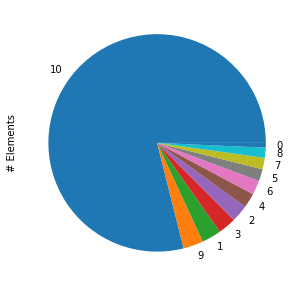

In [54]:
df[df['Discipline'] == 'TRA']['# Elements'].value_counts().plot.pie()

In [55]:
pd.pivot_table(df, values = ['D', 'T'], index = ['Discipline', 'Stage'], columns = 'Razr', aggfunc=[np.mean])

mean                                     \
                                  D                                  T   
Razr                            1rz         KMC          MC        1rz   
Discipline Stage                                                         
DMT        Final          23.364090   37.851351   45.916522   0.000000   
           Qualification  19.435970   34.376923   45.692806   0.000000   
           Semifinal      22.214286   36.307692   50.640394   0.000000   
           Team Final     16.750000   36.347458   51.827586   0.000000   
SYN        Final          48.336449   68.875000   78.119205   0.727234   
           Qualification  23.551282   29.969697   45.378336   0.708226   
           Semifinal            NaN         NaN   87.250000        NaN   
TRA        Final          66.571930   89.200000   93.259740  11.373137   
           Qualification  30.481354   38.611182   54.558130  11.079035   
           Semifinal      61.750000  105.333333  100.520755  11.195250   
           Team Final      0.000000   50.539007   43.083916  11.720511   
TUM        Final          22.501946   42.352941   46.251101   0.000000   
           Qualification  18.426343   33.732759   40.500000   0.000000   
           Semifinal      18.055556   27.250000   48.590909   0.000000   
           Team Final           NaN   33.157895   53.096774        NaN   

                                                
                                                
Razr                            KMC         MC  
Discipline Stage                                
DMT        Final           0.000000   0.000000  
           Qualification   0.000000   0.000000  
           Semifinal       0.000000   0.000000  
           Team Final      0.000000   0.000000  
SYN        Final           0.779000   0.756755  
           Qualification   0.739379   0.673017  
           Semifinal            NaN   0.719750  
TRA        Final          12.868600  13.113808  
           Qualification  12.523166  13.022167  
           Semifinal      13.548571  12.907868  
           Team Final     12.675943  13.830350  
TUM        Final           0.000000   0.000000  
           Qualification   0.000000   0.000000  
           Semifinal       0.000000   0.000000  
           Team Final      0.000000   0.000000

Таблица показывает, что 
* Во всех снарядах чаще всего чем выше стадия соревнований тем сложность и время выше
* С разрядом растет и средняя сложность и время
* Командный финал везде различается: на батуте он всегда с наименьшей сложностью и высоким временем, те учасники предпочитают не рисковать; на минитрампе и акробатической дорожке картина неоднородна 

<AxesSubplot:>

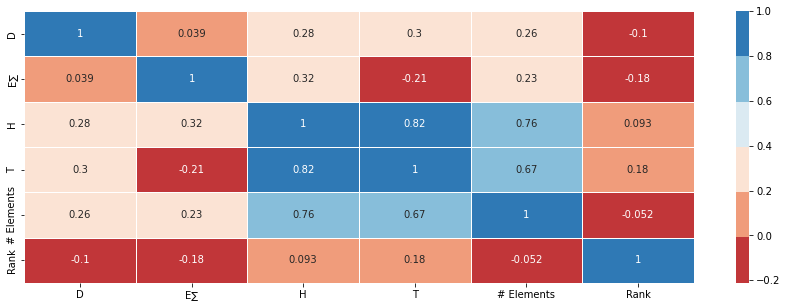

In [56]:
sns.heatmap(df.corr(), cmap= sns.color_palette(palette="RdBu"),linewidths=0.5,annot=True)

Напоследок обратимся к корреляции и она показывает, что существует связь между временем и перемещением, временем и количеством элементов и количеством элементов и перемещением. чем больше один парамент, тем больше другой

# Общий вывод

В ходе нашего исследования, мы в предобработали данные, где полностью изменили таблицу, заменили типы данных, добавили столбцы с разрядом, полным именем и полом спортсмена.

Провели анализ данных, в котором выяснили самые многочисленные сборные за 2021-2022 год, узнали какие являются наиболее результативными, какие сборные на каких снарядах специализуются, какие самые перспективные в будущем. Так же мы сравнили показатели по половому признаку и назвали имена лучших спортсменов.

Общие выводы:
1. Уровень сборных областей сильно различается: одни сборные возят много участников и их уровень высокий, когда как у других нет даже всех снарядов.
2. Батут хоть и является олимпийским видом спорта, но минитрамп проще и на нем больше участников
3. Чтобы прыгать успешно надо развивать в себе все навыки, а не только чистоту или сложность.
4. Девочек в спорте примерно такое же количество как и мальчиков, но они прыгают аккуратнее, а мальчики - сложнее.